In [1]:
import pandas as pd;
import numpy as np
import time
import matplotlib.pyplot as plt

<h1>Rating file analysis</h1>

In [2]:
cols = ['user_id', 'movie_id', 'rating', 'timestamp']
rating_train = pd.read_csv('./data/ml-100k/u2.test', sep='\t', names=cols, encoding='latin-1')


print("Số lượng bản ghi")
print("----------------")
print(rating_train.shape)
print("----------------")


Số lượng bản ghi
----------------
(20000, 4)
----------------


In [3]:
rating_train[:20]

,user_id,movie_id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,8,1,875072484
3,1,9,5,878543541
4,1,21,1,878542772
5,1,22,4,875072404
6,1,26,3,875072442
7,1,30,3,878542515
8,1,32,5,888732909
9,1,34,2,878542869


<h1>Movie file Analysis</h1>

In [4]:
cols = ['movie id', 'movie title', 'release date', 'video release date',
              'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
              'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western']
movies = pd.read_csv('./data/ml-100k/u.item', sep='|', names=cols, encoding='latin-1')
movies['movie title']

0                                        Toy Story (1995)
1                                        GoldenEye (1995)
2                                       Four Rooms (1995)
3                                       Get Shorty (1995)
4                                          Copycat (1995)
5       Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6                                   Twelve Monkeys (1995)
7                                             Babe (1995)
8                                 Dead Man Walking (1995)
9                                      Richard III (1995)
10                                   Seven (Se7en) (1995)
11                             Usual Suspects, The (1995)
12                                Mighty Aphrodite (1995)
13                                     Postino, Il (1994)
14                              Mr. Holland's Opus (1995)
15                     French Twist (Gazon maudit) (1995)
16                             From Dusk Till Dawn (1996)
17            

In [5]:
print("Average good rating per movie: ")
average_ratings_per_movie = rating_train.groupby('movie_id').mean()['rating']
average_good_ratings_per_movie = average_ratings_per_movie[average_ratings_per_movie >= 4]
average_good_ratings_per_movie

Average good rating per movie: 


movie_id
8       4.090909
12      4.354839
22      4.212766
23      4.135135
45      4.583333
50      4.336066
56      4.186047
59      4.052632
64      4.362069
79      4.193548
89      4.190476
98      4.394737
100     4.106383
114     4.133333
116     4.100000
119     5.000000
124     4.179487
126     4.080000
127     4.209877
132     4.089286
134     4.281250
135     4.170213
137     4.081081
165     4.357143
166     4.045455
168     4.059701
169     4.312500
170     4.206897
171     4.250000
172     4.172414
          ...   
1397    4.000000
1427    5.000000
1428    4.000000
1445    4.000000
1451    4.000000
1459    4.000000
1462    4.000000
1466    5.000000
1485    4.000000
1488    4.000000
1499    4.000000
1504    4.000000
1506    4.000000
1514    4.000000
1516    4.500000
1519    4.000000
1524    4.000000
1525    4.000000
1526    4.000000
1531    4.000000
1535    4.000000
1537    4.000000
1540    4.000000
1591    5.000000
1593    4.000000
1602    4.000000
1615    4.000000
1616 

In [6]:
print("Themes: ")
themes = cols[5:]
themes

Themes: 


['unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [7]:
movies_per_theme = []

for theme in themes:
    movies_per_theme.append(movies[movies[theme] == 1]['movie id'])


In [8]:
rating_Action = rating_train[rating_train['movie_id'].isin(movies_per_theme[1])]
print(type(rating_Action))
rating_Action

<class 'pandas.core.frame.DataFrame'>


,user_id,movie_id,rating,timestamp
1,1,2,3,876893171
4,1,21,1,878542772
5,1,22,4,875072404
14,1,68,4,875072688
27,1,144,4,875073180
29,1,147,3,875240993
32,1,173,5,878541803
33,1,176,5,876892468
35,1,181,5,874965739
36,1,187,4,874965678


In [9]:
average_ratings_per_theme = []
count_ratings_per_theme = []

for i in range(len(movies_per_theme)):
    score = rating_train[rating_train['movie_id'].isin(movies_per_theme[i])]['rating'].mean()
    average_ratings_per_theme.append(score)
    quantity = rating_train[rating_train['movie_id'].isin(movies_per_theme[i])]['rating'].count()
    count_ratings_per_theme.append(quantity)


Text(0, 0.5, 'Average ratings of movies per theme (/5)')

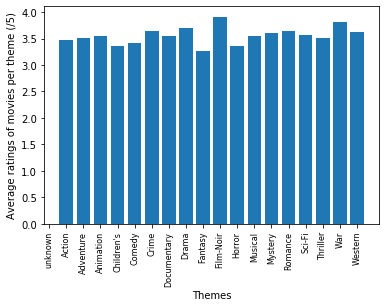

In [10]:
plt.bar(themes, average_ratings_per_theme)
plt.xticks(themes, rotation=90, size=8)
plt.xlabel('Themes')
plt.ylabel('Average ratings of movies per theme (/5)')

Text(0, 0.5, 'Number of users rating movies in per theme')

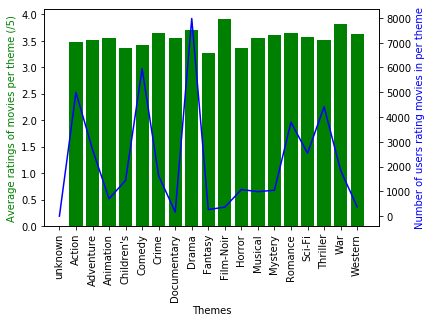

In [11]:
x = themes
y1 = average_ratings_per_theme
y2 = count_ratings_per_theme

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(x, rotation=90, size=10)
ax1.set_xlabel('Themes')
ax1.set_ylabel('Average ratings of movies per theme (/5)', color='g')
ax2.set_ylabel('Number of users rating movies in per theme', color='b')


In [12]:
cols = ['user id', 'age', 'gender', 'occupation', 'zip code']
users = pd.read_csv('./data/ml-100k/u.user', sep='|', names=cols, encoding='latin-1')

users.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


In [14]:
occupations = users['occupation'].unique()
print(type(occupations))
print(occupations)

<class 'numpy.ndarray'>
['technician' 'other' 'writer' 'executive' 'administrator' 'student'
 'lawyer' 'educator' 'scientist' 'entertainment' 'programmer' 'librarian'
 'homemaker' 'artist' 'engineer' 'marketing' 'none' 'healthcare' 'retired'
 'salesman' 'doctor']


In [15]:
quantity_per_occupation = users['occupation'].value_counts()
quantity_per_occupation

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

In [16]:
occupation_label = users['occupation'].value_counts().index.tolist()
occupation_label

['student',
 'other',
 'educator',
 'administrator',
 'engineer',
 'programmer',
 'librarian',
 'writer',
 'executive',
 'scientist',
 'artist',
 'technician',
 'marketing',
 'entertainment',
 'healthcare',
 'retired',
 'lawyer',
 'salesman',
 'none',
 'homemaker',
 'doctor']

Text(0, 0.5, 'Number of people')

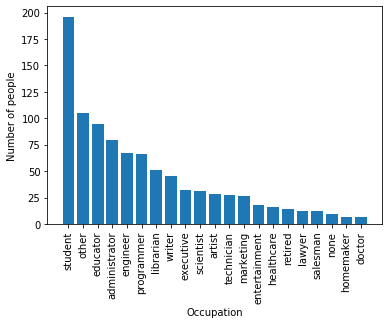

In [17]:
plt.bar(occupation_label, quantity_per_occupation)
plt.xticks(occupation_label, rotation=90, size=10)
plt.xlabel("Occupation")
plt.ylabel("Number of people")

In [18]:
rating_train

,user_id,movie_id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,8,1,875072484
3,1,9,5,878543541
4,1,21,1,878542772
5,1,22,4,875072404
6,1,26,3,875072442
7,1,30,3,878542515
8,1,32,5,888732909
9,1,34,2,878542869


In [19]:
rating_quantity_per_user = rating_train['user_id'].value_counts()
rating_quantity_per_user

405    268
450    221
416    215
417    159
435    156
429    155
13     153
474    138
537    136
497    131
276    124
393    124
457    121
378    118
406    118
472    117
437    115
399    114
234    113
303    112
456    110
454    109
308    106
504    106
385    103
551    103
94     103
532    102
533    102
59     101
      ... 
273      4
242      4
34       4
240      3
140      3
228      3
172      3
46       3
631      3
155      3
611      3
134      3
602      3
302      3
111      3
581      3
647      3
635      3
613      2
651      2
258      2
598      2
626      2
578      2
636      2
584      2
571      1
310      1
649      1
658      1
Name: user_id, Length: 653, dtype: int64

In [20]:
user_id_corr_quantity = rating_train['user_id'].value_counts().index.tolist()
print('There are ' + str(len(users)) + ' users in movie system')
print('There are ' + str(len(user_id_corr_quantity)) + ' users rating')
user_id_corr_quantity

There are 943 users in movie system
There are 653 users rating


[405,
 450,
 416,
 417,
 435,
 429,
 13,
 474,
 537,
 497,
 276,
 393,
 457,
 378,
 406,
 472,
 437,
 399,
 234,
 303,
 456,
 454,
 308,
 504,
 385,
 551,
 94,
 532,
 533,
 59,
 334,
 293,
 363,
 279,
 500,
 387,
 487,
 7,
 181,
 561,
 479,
 506,
 455,
 201,
 130,
 327,
 222,
 592,
 524,
 151,
 92,
 339,
 425,
 194,
 145,
 452,
 495,
 407,
 389,
 95,
 269,
 374,
 268,
 373,
 535,
 85,
 311,
 90,
 458,
 178,
 346,
 18,
 271,
 343,
 313,
 354,
 291,
 286,
 486,
 328,
 280,
 299,
 301,
 60,
 312,
 409,
 453,
 184,
 314,
 488,
 468,
 109,
 498,
 207,
 493,
 394,
 463,
 459,
 246,
 484,
 379,
 514,
 342,
 200,
 380,
 144,
 6,
 244,
 401,
 62,
 64,
 442,
 1,
 496,
 347,
 536,
 447,
 87,
 503,
 256,
 543,
 436,
 478,
 43,
 345,
 445,
 128,
 381,
 305,
 102,
 21,
 295,
 398,
 527,
 249,
 11,
 326,
 545,
 267,
 542,
 466,
 521,
 489,
 426,
 198,
 189,
 332,
 174,
 254,
 5,
 318,
 344,
 23,
 125,
 330,
 320,
 361,
 110,
 297,
 119,
 10,
 465,
 566,
 391,
 336,
 83,
 158,
 422,
 505,
 548,
 451,


In [21]:
users

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


<h1>User Clustering</h1>

In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


In [23]:
student_users = np.where(users["occupation"] == "student")
print(type(student_users))
student_users


<class 'tuple'>


(array([  8,  29,  31,  32,  35,  36,  48,  51,  65,  66,  67,  72,  75,
         80,  93,  98, 100, 102, 103, 109, 116, 123, 134, 138, 139, 152,
        153, 158, 187, 192, 197, 202, 205, 220, 222, 225, 227, 229, 240,
        244, 245, 247, 248, 256, 257, 258, 261, 269, 273, 275, 280, 285,
        290, 300, 302, 303, 306, 313, 319, 321, 322, 323, 326, 331, 340,
        346, 347, 349, 354, 358, 360, 362, 365, 366, 367, 368, 371, 376,
        377, 390, 392, 396, 407, 415, 424, 427, 428, 433, 441, 450, 452,
        458, 460, 461, 465, 470, 471, 472, 475, 476, 481, 483, 495, 496,
        500, 501, 510, 516, 520, 527, 531, 533, 540, 541, 549, 559, 564,
        565, 576, 579, 581, 583, 585, 587, 591, 598, 608, 609, 617, 618,
        620, 623, 630, 631, 639, 640, 641, 645, 648, 653, 659, 673, 678,
        683, 699, 704, 705, 709, 710, 711, 724, 726, 728, 741, 756, 757,
        758, 760, 764, 769, 770, 772, 773, 777, 778, 780, 786, 792, 812,
        816, 819, 837, 846, 848, 853, 860, 862, 868

In [24]:
user_list_by_occupation = np.where(users["occupation"] == 'student')
print(list(user_list_by_occupation[0]))

[8, 29, 31, 32, 35, 36, 48, 51, 65, 66, 67, 72, 75, 80, 93, 98, 100, 102, 103, 109, 116, 123, 134, 138, 139, 152, 153, 158, 187, 192, 197, 202, 205, 220, 222, 225, 227, 229, 240, 244, 245, 247, 248, 256, 257, 258, 261, 269, 273, 275, 280, 285, 290, 300, 302, 303, 306, 313, 319, 321, 322, 323, 326, 331, 340, 346, 347, 349, 354, 358, 360, 362, 365, 366, 367, 368, 371, 376, 377, 390, 392, 396, 407, 415, 424, 427, 428, 433, 441, 450, 452, 458, 460, 461, 465, 470, 471, 472, 475, 476, 481, 483, 495, 496, 500, 501, 510, 516, 520, 527, 531, 533, 540, 541, 549, 559, 564, 565, 576, 579, 581, 583, 585, 587, 591, 598, 608, 609, 617, 618, 620, 623, 630, 631, 639, 640, 641, 645, 648, 653, 659, 673, 678, 683, 699, 704, 705, 709, 710, 711, 724, 726, 728, 741, 756, 757, 758, 760, 764, 769, 770, 772, 773, 777, 778, 780, 786, 792, 812, 816, 819, 837, 846, 848, 853, 860, 862, 868, 869, 871, 874, 879, 885, 886, 889, 892, 903, 912, 916, 920, 922, 927, 932, 938, 940, 942]


In [25]:
clusters = {}
for lab in occupation_label:
    user_list_by_occupation = np.where(users["occupation"] == lab)
    clusters.update({lab: list(user_list_by_occupation[0])})

clusters

{'student': [8,
  29,
  31,
  32,
  35,
  36,
  48,
  51,
  65,
  66,
  67,
  72,
  75,
  80,
  93,
  98,
  100,
  102,
  103,
  109,
  116,
  123,
  134,
  138,
  139,
  152,
  153,
  158,
  187,
  192,
  197,
  202,
  205,
  220,
  222,
  225,
  227,
  229,
  240,
  244,
  245,
  247,
  248,
  256,
  257,
  258,
  261,
  269,
  273,
  275,
  280,
  285,
  290,
  300,
  302,
  303,
  306,
  313,
  319,
  321,
  322,
  323,
  326,
  331,
  340,
  346,
  347,
  349,
  354,
  358,
  360,
  362,
  365,
  366,
  367,
  368,
  371,
  376,
  377,
  390,
  392,
  396,
  407,
  415,
  424,
  427,
  428,
  433,
  441,
  450,
  452,
  458,
  460,
  461,
  465,
  470,
  471,
  472,
  475,
  476,
  481,
  483,
  495,
  496,
  500,
  501,
  510,
  516,
  520,
  527,
  531,
  533,
  540,
  541,
  549,
  559,
  564,
  565,
  576,
  579,
  581,
  583,
  585,
  587,
  591,
  598,
  608,
  609,
  617,
  618,
  620,
  623,
  630,
  631,
  639,
  640,
  641,
  645,
  648,
  653,
  659,
  673,
  678,
  683

In [26]:
average_rating_by_occupation = []
for lab in occupation_label:
    user_list_by_occupation = clusters[lab]
    rating_by_occupation = rating_train[rating_train["user_id"].isin(user_list_by_occupation)]['rating'].astype('int32')
    average_rating_by_occupation.append(rating_by_occupation.mean())

average_rating_by_occupation


[3.582496413199426,
 3.6408668730650153,
 3.393465255407271,
 3.482134780642243,
 3.5266497461928936,
 3.557263643351268,
 3.6356673960612693,
 3.405951115834219,
 3.6215827338129496,
 3.4103992571959147,
 3.480968858131488,
 3.5544041450777204,
 3.7738589211618256,
 3.649155722326454,
 3.9875,
 3.6092436974789917,
 3.7885714285714287,
 3.5233415233415233,
 3.2454873646209386,
 3.8852459016393444,
 3.9327731092436973]

Text(0, 0.5, 'Number of users per occupation type')

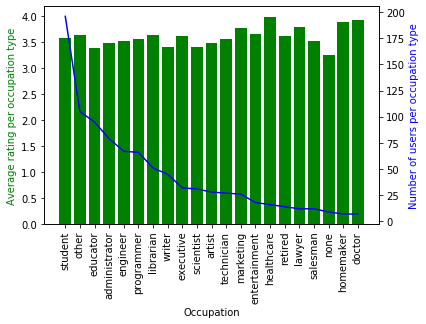

In [27]:
x = occupation_label
y1 = average_rating_by_occupation
y2 = quantity_per_occupation

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(x, rotation=90, size=10)
ax1.set_xlabel('Occupation')
ax1.set_ylabel('Average rating per occupation type', color='g')
ax2.set_ylabel('Number of users per occupation type', color='b')


Statistics of Datasets

In [28]:
print("Length of rating data: ", len(rating_train))
print("Length of movie data: ", len(movies))
print("Length of user data: ", len(users))

sparsity = 1 - len(rating_train) / (len(movies) * len(users))
print(f'Sparsity of rating data: {sparsity:f}')

Length of rating data:  20000
Length of movie data:  1682
Length of user data:  943
Sparsity of rating data: 0.987391


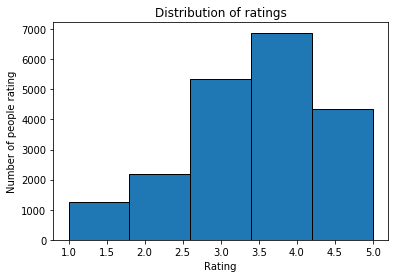

In [29]:

plt.hist(rating_train['rating'], bins=5, ec='black')
plt.xlabel('Rating')
plt.ylabel('Number of people rating')
plt.title('Distribution of ratings')
plt.show()

In [30]:
import datetime
import pytz

def convert(timestamp):

    # a timestamp I'd like to convert
    my_timestamp = datetime.datetime.fromtimestamp(int(timestamp))

    # create both timezone objects
    old_timezone = pytz.timezone("America/Martinique")
    new_timezone = pytz.timezone("America/Martinique")

    # two-step process
    localized_timestamp = old_timezone.localize(my_timestamp)
    new_timezone_timestamp = localized_timestamp.astimezone(new_timezone)

    # or alternatively, as an one-liner
    new_timezone_timestamp = old_timezone.localize(my_timestamp).astimezone(new_timezone) 


    return new_timezone_timestamp.hour

In [31]:
rating_train['Hour'] = [convert(i) for i in rating_train['timestamp']]
rating_train

,user_id,movie_id,rating,timestamp,Hour
0,1,1,5,874965758,5
1,1,2,3,876893171,12
2,1,8,1,875072484,10
3,1,9,5,878543541,14
4,1,21,1,878542772,14
5,1,22,4,875072404,10
6,1,26,3,875072442,10
7,1,30,3,878542515,14
8,1,32,5,888732909,13
9,1,34,2,878542869,14


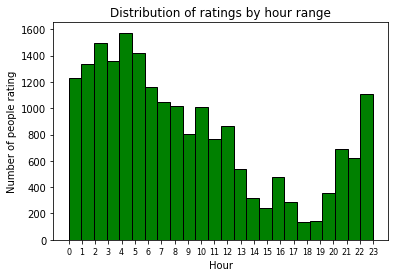

In [32]:
num_bins = 24
plt.hist(rating_train['Hour'], num_bins , ec='black', color='green')
plt.xticks(range(0, 24), size=8)
plt.xlabel('Hour')
plt.ylabel('Number of people rating')
plt.title('Distribution of ratings by hour range')
plt.show()

In [33]:
movies.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


(-0.5, 3999.5, 1999.5, -0.5)

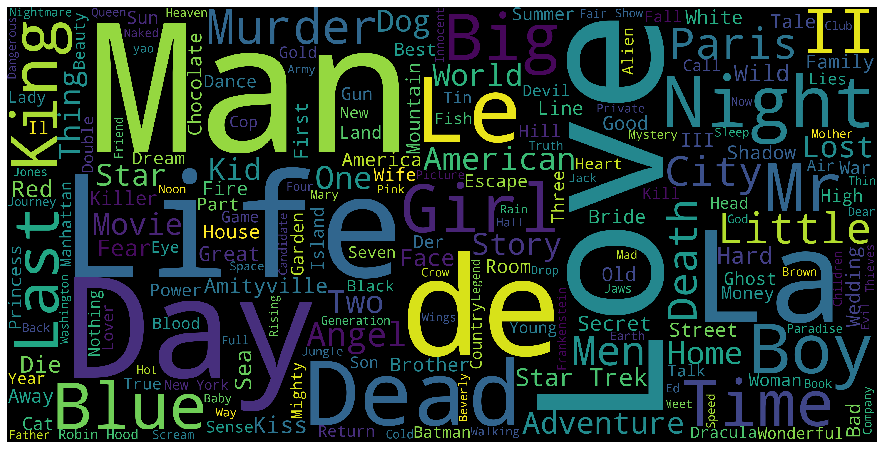

In [34]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

movies['movie title'] = movies['movie title'].fillna("").astype('str')
title_corpus = ' '.join(movies['movie title'])
title_wordcloud = WordCloud(stopwords = STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

plt.figure(figsize=(16, 8))
plt.imshow(title_wordcloud)
plt.axis('off')


In [35]:
rating_train['rating'].describe()

count    20000.000000
mean         3.543450
std          1.130564
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

D:\long.lt20194099\Python\Learn\Deep Learning\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


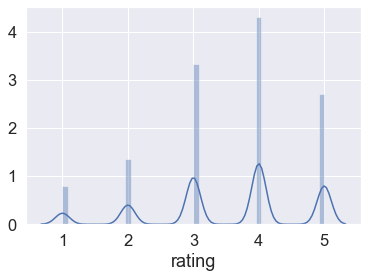

In [36]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)

sns.distplot(rating_train['rating'].fillna(rating_train['rating'].mean()))

In [37]:
no_movies_per_theme = dict()

for i in range(len(movies)):
    for j in range(len(themes)):
        theme = themes[j]
        if movies.iat[i, j + 5] == 1:
            if theme in no_movies_per_theme.keys():
                no_movies_per_theme.update({theme: no_movies_per_theme[theme] + 1})
            else:
                no_movies_per_theme.update({theme: 1})


no_movies_per_theme


{'Animation': 42,
 "Children's": 122,
 'Comedy': 505,
 'Action': 251,
 'Adventure': 135,
 'Thriller': 251,
 'Drama': 725,
 'Crime': 109,
 'Sci-Fi': 101,
 'War': 71,
 'Romance': 247,
 'Horror': 92,
 'Musical': 56,
 'Documentary': 50,
 'Western': 27,
 'Fantasy': 22,
 'Film-Noir': 24,
 'Mystery': 61,
 'unknown': 2}

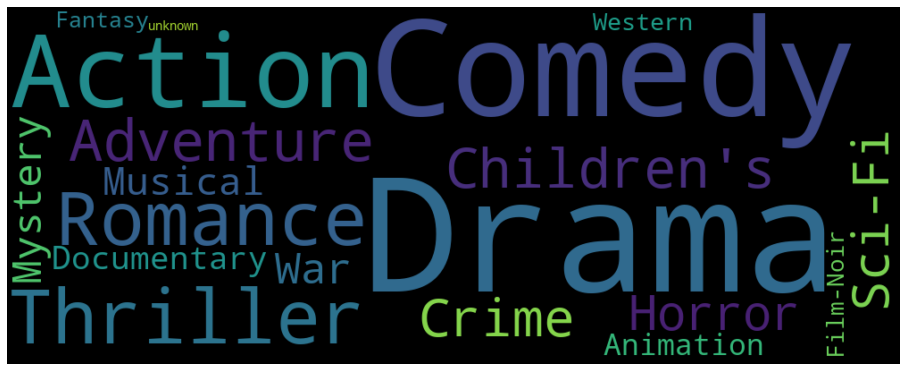

In [38]:
theme_wordcloud = WordCloud(width=1000, height=400, background_color='black')
theme_wordcloud.generate_from_frequencies(no_movies_per_theme)

fig, ax = plt.subplots(figsize=(16, 8))
plt.imshow(theme_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
zipcodes = users['zip code'].value_counts().index.tolist()
quantity_users_per_area = users['zip code'].value_counts()

users['zip code'].value_counts()

55414    9
55105    6
20009    5
10003    5
55337    5
55408    4
55454    4
27514    4
60201    3
94043    3
55409    3
97301    3
61820    3
14216    3
62901    3
02215    3
22903    3
48103    3
55104    3
10021    3
61801    3
55106    3
63108    3
11217    3
22902    3
80525    3
55108    3
55113    3
61755    2
90210    2
        ..
16509    1
49931    1
60657    1
06492    1
91903    1
98133    1
08403    1
03062    1
87501    1
92020    1
43537    1
82435    1
78602    1
85251    1
26241    1
33763    1
60641    1
90405    1
01945    1
20001    1
94115    1
94143    1
06906    1
08360    1
40504    1
98801    1
42101    1
90291    1
02136    1
90095    1
Name: zip code, Length: 795, dtype: int64